<h1 align = "center"> Departamento de Recursos Humanos </h1>

Retener a los empleados que tienen un alto potencial de crecimiento y desarrollo dentro de la empresa. El objetivo es analizar los datos y crear un modelo predictivo para predecir la probabilidad de que un empleado abandone la empresa.

Empresas gastan en México 12 a 20 mil pesos por mes en la contratación y capacitación de nuevos empleados. La rotación de personal puede ser costosa y perjudicial para la moral del equipo. Por lo tanto, es importante identificar a los empleados que tienen un alto potencial de crecimiento y desarrollo dentro de la empresa y retenerlos.

Fuente: [https://www.glassdoor.com.mx/Sueldos/reclutamiento-y-capacitacion-sueldo-SRCH_KO0,28.htm](https://www.glassdoor.com.mx/Sueldos/reclutamiento-y-capacitacion-sueldo-SRCH_KO0,28.htm)

El dataset con el que se trabajará es el de [IBM HR Analytics Employee Attrition & Performance](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset) de Kaggle. Este conjunto de datos contiene información sobre empleados, incluyendo su desempeño, satisfacción laboral y si han abandonado la empresa o no. El objetivo es analizar los datos y crear un modelo predictivo para predecir la probabilidad de que un empleado abandone la empresa.

### Temas:

-   **Introducción**
    * Objetivo: Predecir la probabilidad de abandono de empleados y retener talento clave.
    * Impacto económico y estratégico de la rotación de personal.

-   **Carga y Exploración Inicial de Datos (EDA)**
    * Descripción general del dataset de IBM HR Analytics.
    * Identificación y manejo (verificación) de datos faltantes.
    * Análisis inicial de la distribución de variables numéricas y categóricas.
    * Análisis del **desbalance de clases** en la variable objetivo `Attrition`.

-   **Análisis Visual y de Correlación**
    * Visualización de la distribución de variables clave y su relación con `Attrition`.
    * Cálculo y visualización de la matriz de correlación entre variables numéricas para identificar relaciones.

-   **Preprocesamiento de Datos para Modelado**
    * Codificación de etiquetas (*Label Encoding*) para variables binarias (`Attrition`, `OverTime`, `Over18`).
    * Eliminación de columnas identificadas como irrelevantes (`EmployeeCount`, `EmployeeNumber`, `StandardHours`, `Over18`).
    * Separación de variables categóricas nominales y numéricas.
    * Codificación One-Hot (*One-Hot Encoding*) de variables categóricas nominales.
    * Combinación de las características numéricas y las categóricas codificadas.
    * Escalado de características (*Feature Scaling*) para normalizar el rango de valores numéricos (utilizando `MinMaxScaler`).

-   **Preparación del Conjunto de Datos para Entrenamiento**
    * División del conjunto de datos preprocesado en conjuntos de entrenamiento y prueba (`X_train`, `X_test`, `y_train`, `y_test`).

-   **Construcción y Entrenamiento del Modelo de Clasificación**
    * Construcción del Clasificador de Regresión Logística.
    * Entrenamiento del modelo utilizando el conjunto de entrenamiento.

-   **Evaluación del Modelo**
    * Realización de predicciones sobre el conjunto de prueba.
    * Cálculo de la métrica de Accuracy (Precisión General).
    * Construcción y visualización de la **Matriz de Confusión** para entender el rendimiento por clase.
    * Análisis detallado del **Reporte de Clasificación** (Precision, Recall, F1-score) para evaluar el rendimiento en cada clase, especialmente la minoritaria.

-   **Conclusiones e Interpretación de Resultados**
    * Interpretación de los resultados de la evaluación, destacando el impacto del desbalance de clases.
    * Resumen de los hallazgos clave sobre los factores que influyen en el abandono (basado en EDA y rendimiento del modelo).
    * Mención de **Posibles Mejoras Futuras** para optimizar el rendimiento del modelo.

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf

In [25]:
datos_hr = pd.read_csv("./Datos/Human_Resources.csv")
datos_hr.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [26]:
print(f"El conjunto de datos contiene {datos_hr.shape[0]} filas y {datos_hr.shape[1]} columnas.")

El conjunto de datos contiene 1470 filas y 35 columnas.


In [27]:
datos_hr.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


#### Label encoding
El label encoding es una técnica de preprocesamiento de datos que convierte variables categóricas en variables numéricas. Esto es útil para algoritmos de aprendizaje automático que requieren entradas numéricas. En este caso, se utilizará el label encoding para convertir las variables categóricas en variables numéricas.

In [28]:
datos_hr["Attrition"] = datos_hr["Attrition"].map({"Yes": 1, "No": 0})
datos_hr["Over18"] = datos_hr["Over18"].map({"Y": 1, "N": 0})
datos_hr["OverTime"] = datos_hr["OverTime"].map({"Yes": 1, "No": 0})

### Datos faltantes
Los datos faltantes son un problema común en el análisis de datos. Los datos faltantes pueden afectar la precisión de los modelos de aprendizaje automático y pueden llevar a conclusiones erróneas. En este caso, se utilizará la función isnull() para identificar los datos faltantes en el conjunto de datos.

In [29]:
datos_hr.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

#### Visualización de datos
La visualización de datos es una parte importante del análisis de datos. La visualización de datos permite identificar patrones y tendencias en los datos.

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Attrition'}>,
        <Axes: title={'center': 'DailyRate'}>,
        <Axes: title={'center': 'DistanceFromHome'}>,
        <Axes: title={'center': 'Education'}>],
       [<Axes: title={'center': 'EmployeeCount'}>,
        <Axes: title={'center': 'EmployeeNumber'}>,
        <Axes: title={'center': 'EnvironmentSatisfaction'}>,
        <Axes: title={'center': 'HourlyRate'}>,
        <Axes: title={'center': 'JobInvolvement'}>],
       [<Axes: title={'center': 'JobLevel'}>,
        <Axes: title={'center': 'JobSatisfaction'}>,
        <Axes: title={'center': 'MonthlyIncome'}>,
        <Axes: title={'center': 'MonthlyRate'}>,
        <Axes: title={'center': 'NumCompaniesWorked'}>],
       [<Axes: title={'center': 'Over18'}>,
        <Axes: title={'center': 'OverTime'}>,
        <Axes: title={'center': 'PercentSalaryHike'}>,
        <Axes: title={'center': 'PerformanceRating'}>,
        <Axes: title={'center': 'Relations

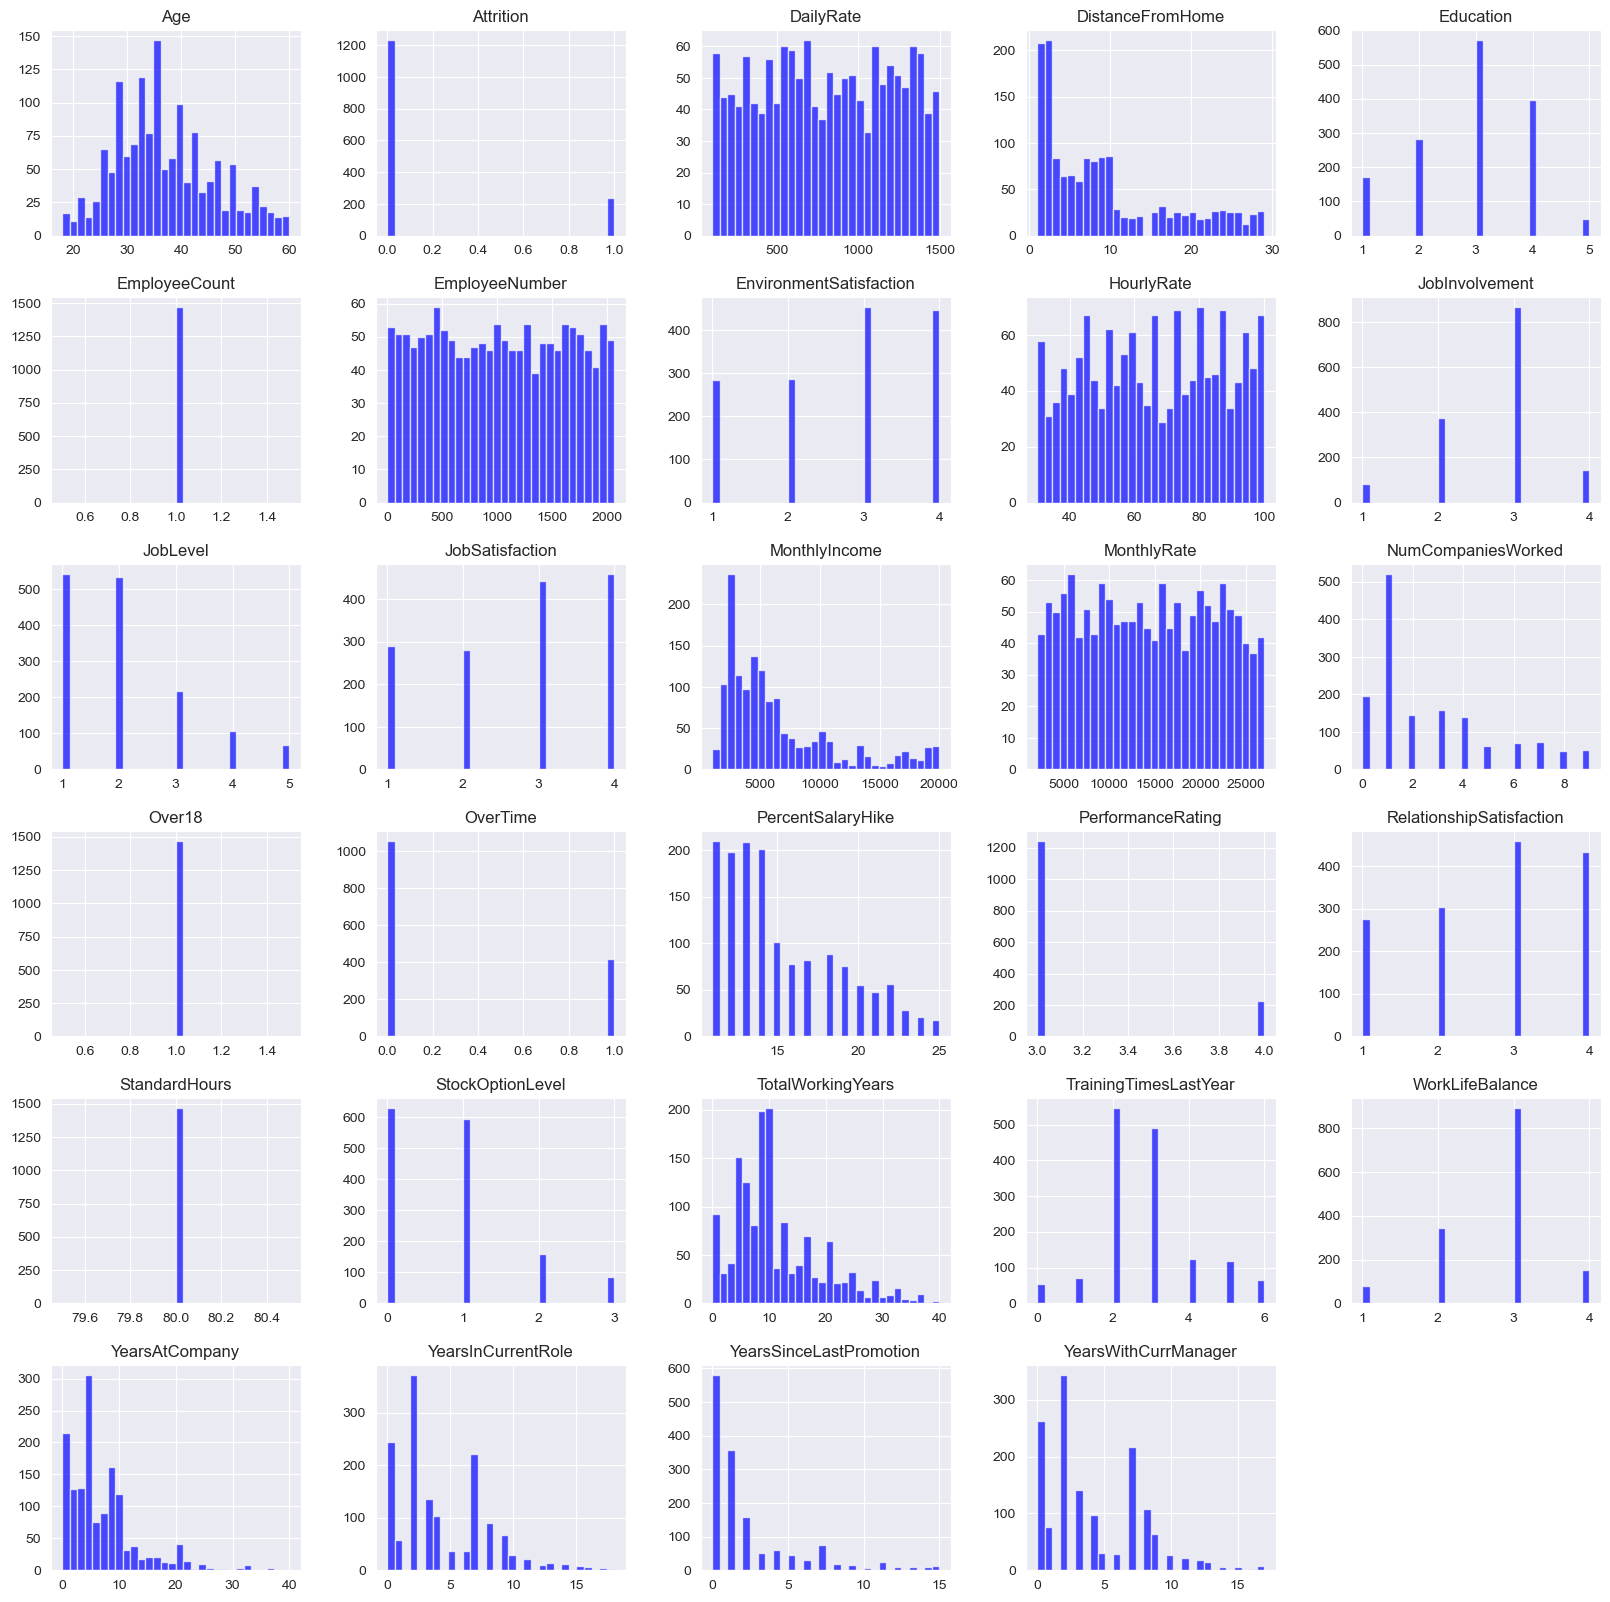

In [30]:
datos_hr.hist(bins=30, figsize=(20, 20), color="blue", alpha=0.7)

#### Eliminación de columnas innecesarias
Algunas columnas del conjunto de datos no son necesarias para el análisis. Estas columnas se eliminarán del conjunto de datos. Las columnas que se eliminarán son: EmployeeCount, EmployeeNumber, StandardHours y Over18.

In [31]:
datos_hr.drop(["EmployeeCount", "EmployeeNumber", "StandardHours", "Over18"], axis=1, inplace=True)

#### Empleados que abandonaron la empresa
Los empleados que abandonaron la empresa son aquellos que tienen un valor de 1 en la columna Attrition. Se utilizará la función query() para filtrar los empleados que abandonaron la empresa y los empleados que continúan en la empresa.

In [32]:
data_abandonaro = datos_hr.query("Attrition == 1")
data_continuan = datos_hr.query("Attrition == 0")


print(f"El conjunto de datos contiene {data_abandonaro.shape[0]} empleados que abandonaron la empresa y {data_continuan.shape[0]} empleados que continúan en la empresa.")
print(f"El porcentaje de empleados que abandonaron la empresa es del {data_abandonaro.shape[0] / datos_hr.shape[0] * 100:.2f}%. y el porcentaje de empleados que continúan en la empresa es del {data_continuan.shape[0] / datos_hr.shape[0] * 100:.2f}%.")
print()

El conjunto de datos contiene 237 empleados que abandonaron la empresa y 1233 empleados que continúan en la empresa.
El porcentaje de empleados que abandonaron la empresa es del 16.12%. y el porcentaje de empleados que continúan en la empresa es del 83.88%.



#### Correlación
La correlación es una medida estadística que indica la relación entre dos variables. La correlación puede ser positiva, negativa o nula. La correlación positiva indica que a medida que una variable aumenta, la otra variable también aumenta. La correlación negativa indica que a medida que una variable aumenta, la otra variable disminuye. La correlación nula indica que no hay relación entre las dos variables. En este caso, se utilizará la función corr() para calcular la correlación entre las variables del conjunto de datos.

<Axes: >

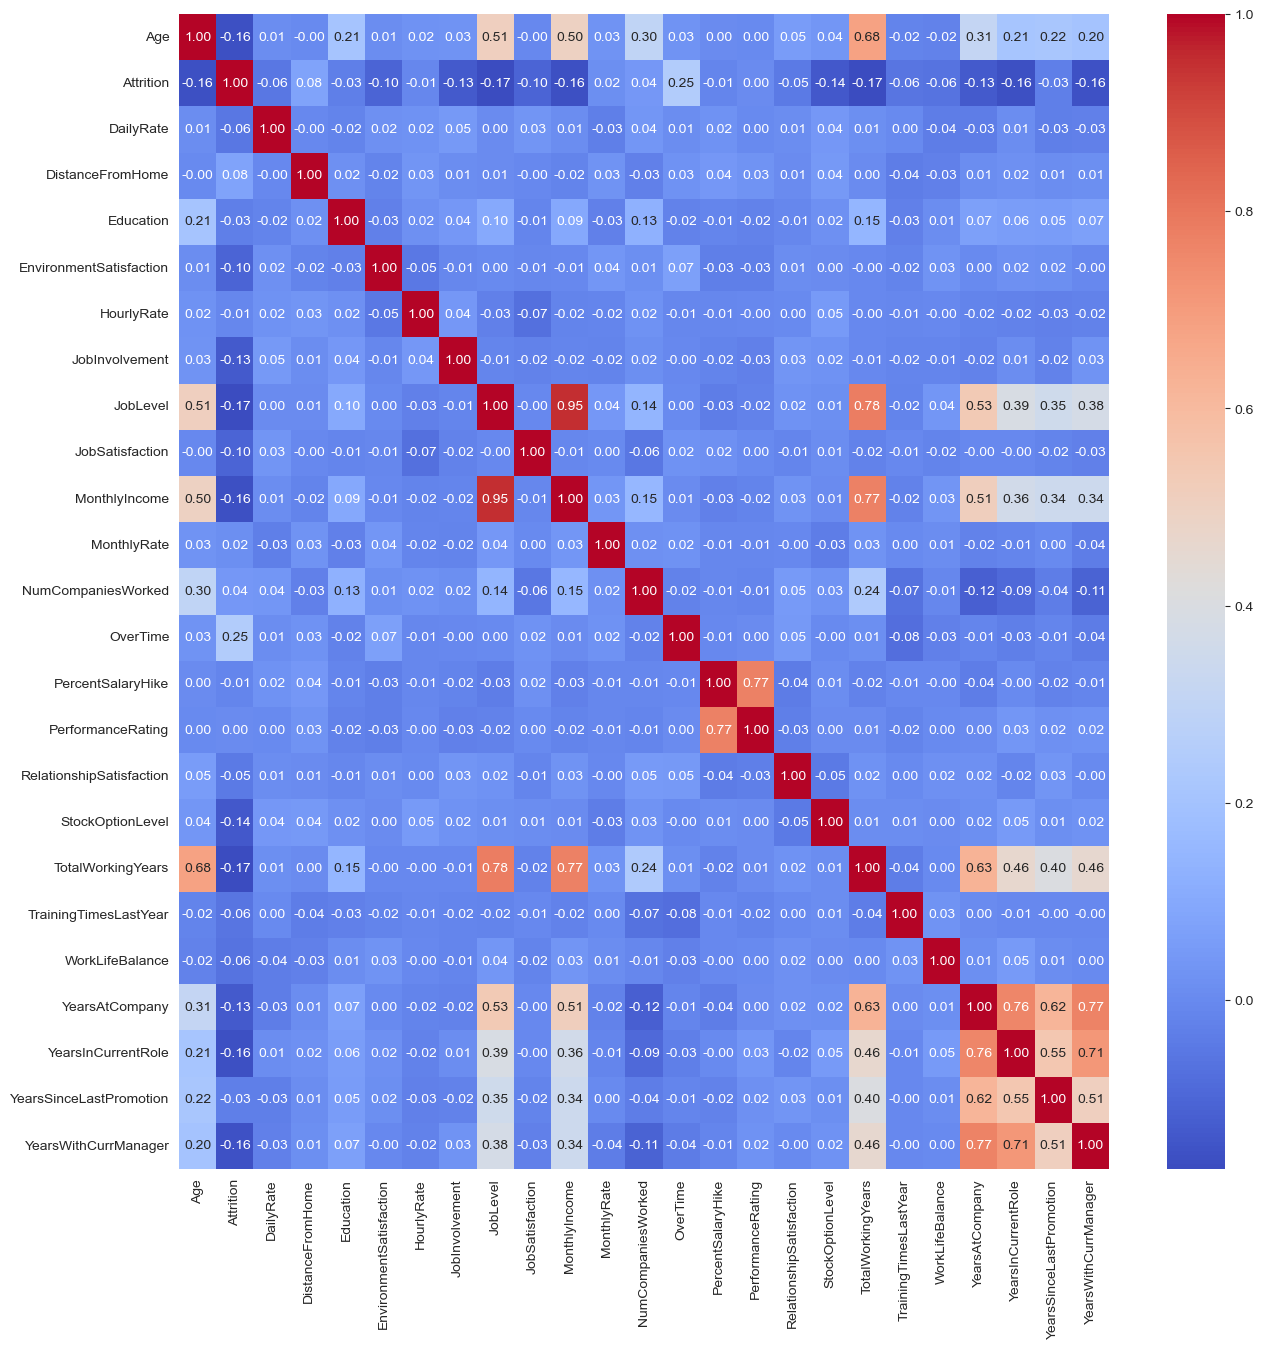

In [33]:
datos_numericos = datos_hr.select_dtypes(include=[np.number])
correlacion_abandonaron = datos_numericos.corr()

fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(correlacion_abandonaron, annot=True, fmt=".2f", cmap="coolwarm", ax=ax)

<Axes: xlabel='JobLevel', ylabel='count'>

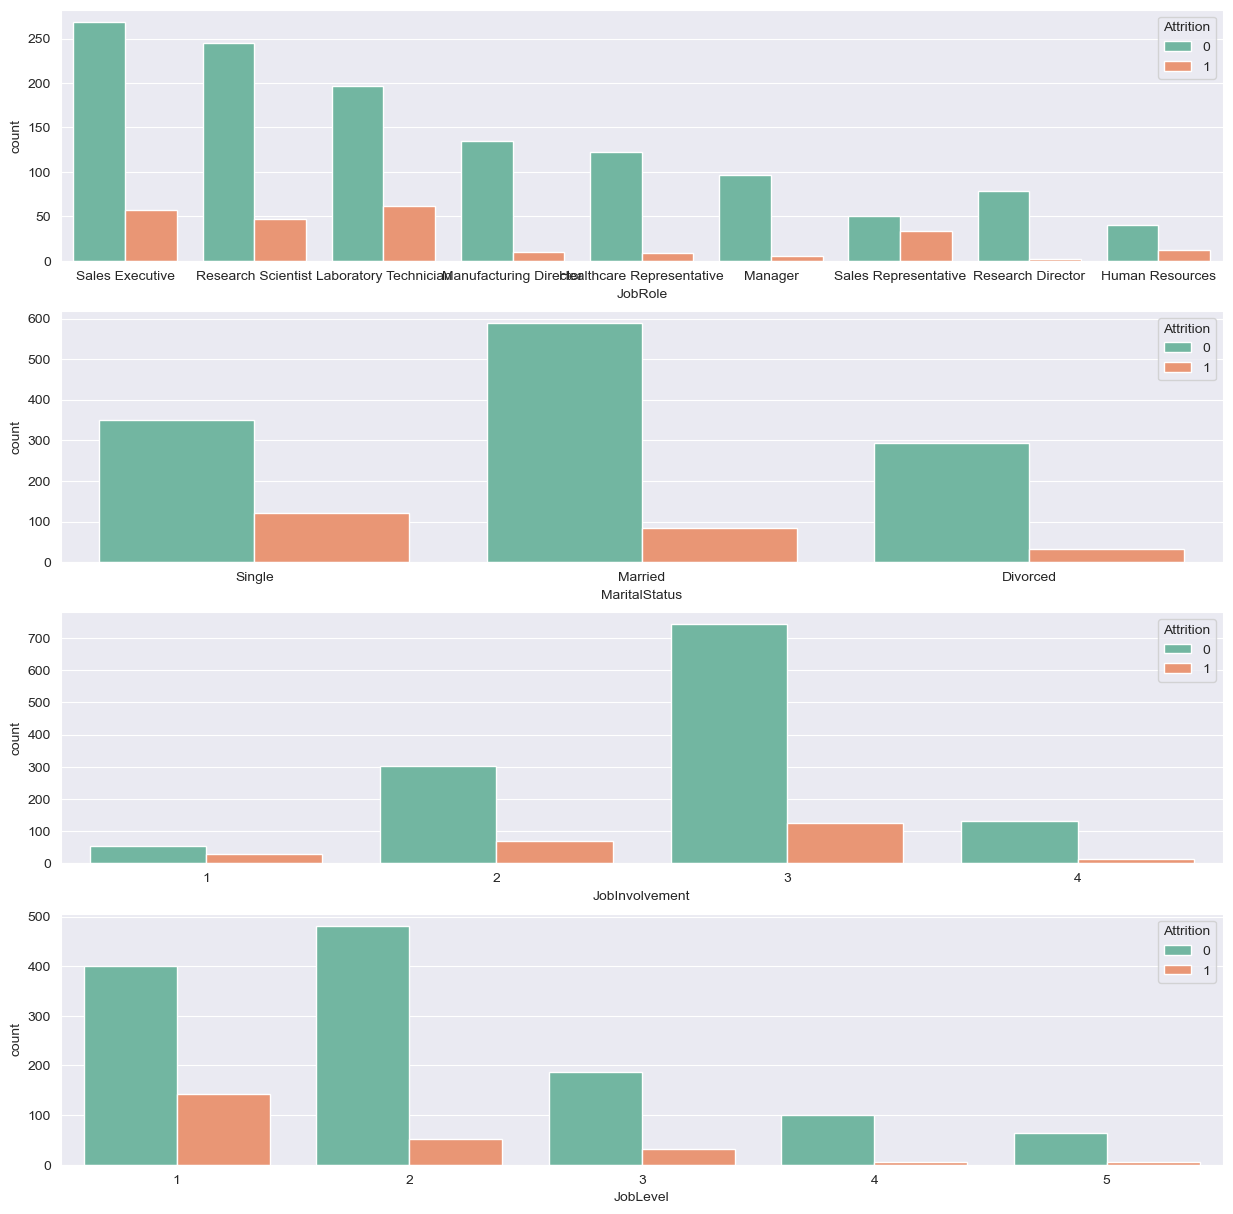

In [34]:
# Attrition 1 = abandonaron & Attrition 0 = continuan

plt.figure(figsize=(15, 15))

plt.subplot(411)
sns.countplot(x="JobRole", hue="Attrition", data=datos_hr, palette="Set2")

plt.subplot(412)
sns.countplot(x="MaritalStatus", hue="Attrition", data=datos_hr, palette="Set2")

plt.subplot(413)
sns.countplot(x="JobInvolvement", hue="Attrition", data=datos_hr, palette="Set2")

plt.subplot(414)
sns.countplot(x="JobLevel", hue="Attrition", data=datos_hr, palette="Set2")

#### Conclusiones de la correlación
**JobRole vs Attrition:** Podemos notar que los empleados que ocupan el puesto de "Sales Representative" son los que más abandonan la empresa, mientras que los empleados que ocupan el puesto de "Research Director" son los que menos abandonan la empresa.

**MaritalStatus vs Attrition:** Los empleados solteros son los que más abandonan la empresa, mientras que los empleados casados son los que menos abandonan la empresa.

**JobInvolvement vs Attrition:** Los empleados que tienen un bajo nivel de involucramiento son los que más abandonan la empresa, mientras que los empleados que tienen un alto nivel de involucramiento son los que menos abandonan la empresa.

**JobLevel vs Attrition:** Los empleados que ocupan un puesto de bajo nivel son los que más abandonan la empresa, mientras que los empleados que ocupan un puesto de alto nivel son los que menos abandonan la empresa.

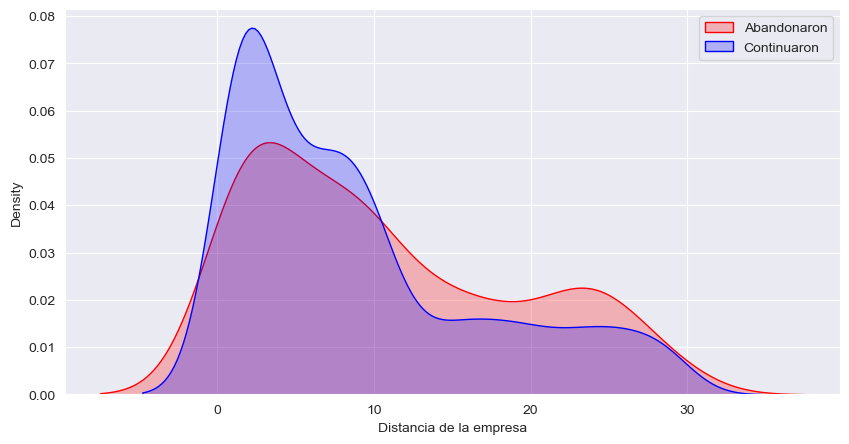

In [35]:
plt.figure(figsize=(10, 5))

sns.kdeplot(x=data_abandonaro["DistanceFromHome"], label="Abandonaron", color="red", fill=True)
sns.kdeplot(x=data_continuan["DistanceFromHome"], label="Continuaron", color="blue", fill=True)
plt.xlabel("Distancia de la empresa")
plt.legend()

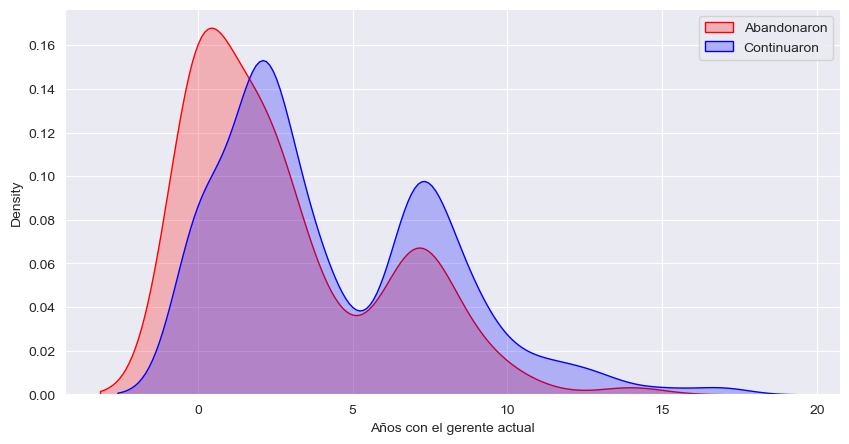

In [36]:
plt.figure(figsize=(10, 5))

sns.kdeplot(x=data_abandonaro["YearsWithCurrManager"], label="Abandonaron", color="red", fill=True)
sns.kdeplot(x=data_continuan["YearsWithCurrManager"], label="Continuaron", color="blue", fill=True)
plt.xlabel("Años con el gerente actual")
plt.legend()

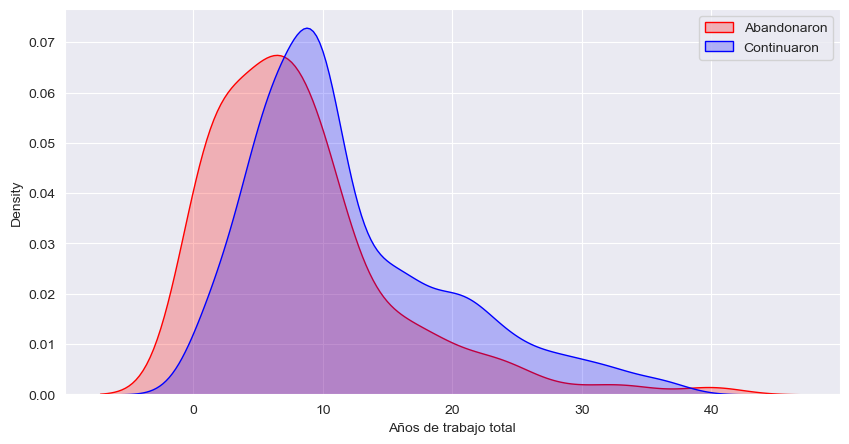

In [37]:
plt.figure(figsize=(10, 5))

sns.kdeplot(x=data_abandonaro["TotalWorkingYears"], label="Abandonaron", color="red", fill=True)
sns.kdeplot(x=data_continuan["TotalWorkingYears"], label="Continuaron", color="blue", fill=True)
plt.xlabel("Años de trabajo total")
plt.legend()

<Axes: xlabel='MonthlyIncome'>

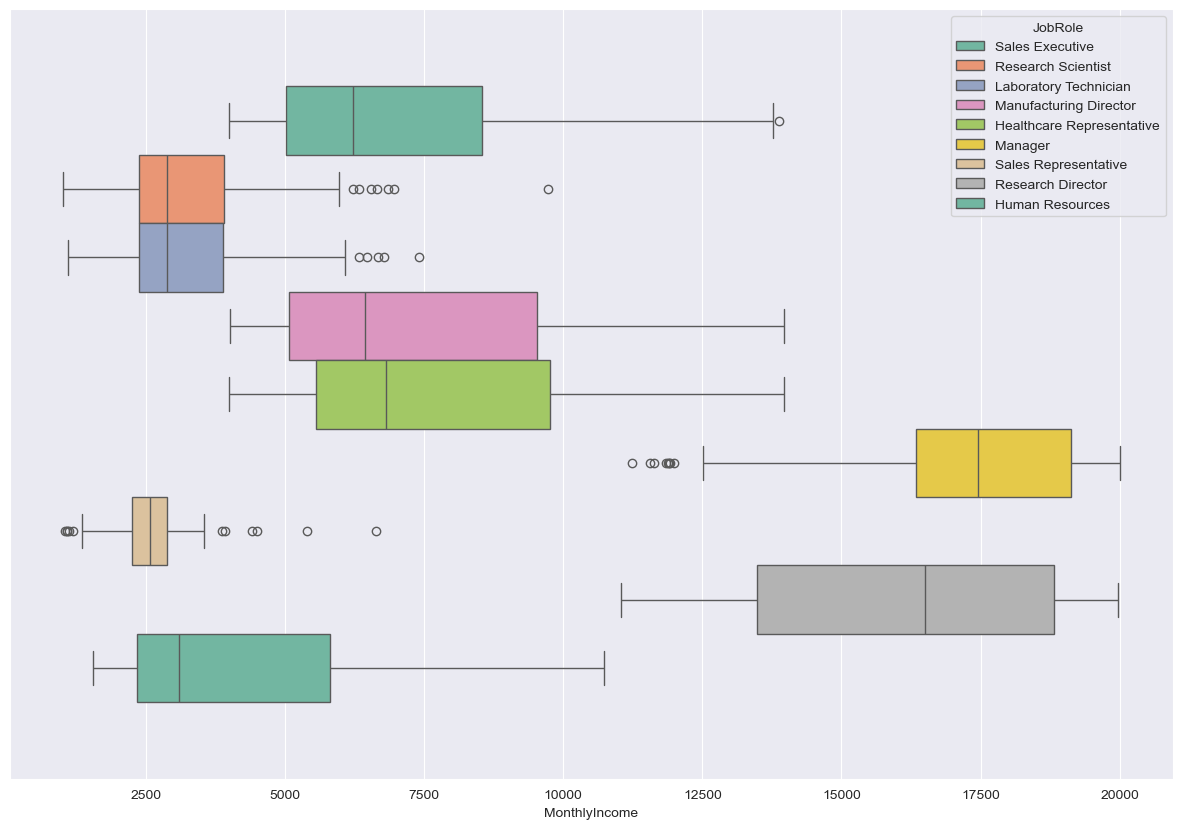

In [38]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=datos_hr, x="MonthlyIncome", hue="JobRole", palette="Set2")

#### Preparación de Datos para Modelos de Machine Learning: Codificación y Escalado

La mayoría de los algoritmos de Machine Learning requieren que los datos de entrada sean de tipo numérico y, a menudo, que estén en una escala similar para funcionar correctamente y de manera eficiente. En este proyecto, nuestro conjunto de datos `datos_hr` contiene tanto variables categóricas (texto) como variables numéricas con diferentes rangos de valores. Por lo tanto, necesitamos aplicar técnicas de preprocesamiento para transformar los datos a un formato adecuado. Los pasos realizados son:

1.  **Separación de Variables Categóricas y Numéricas:**
    Identificamos las columnas que contienen datos de texto (categóricas) y las separamos del resto de las columnas, que son numéricas. Esto es necesario porque aplicaremos diferentes transformaciones a cada tipo de dato.

2. **Codificación One-Hot (One-Hot Encoding - OHE) de Variables Categóricas:**
    Los modelos de Machine Learning no pueden trabajar directamente con texto. La técnica de One-Hot Encoding convierte cada categoría única dentro de una columna categórica en una nueva columna binaria (que contiene solo 0s y 1s). Si una fila pertenece a esa categoría, la nueva columna tendrá un 1, de lo contrario, tendrá un 0.



In [39]:
datos_categoricos = datos_hr[["BusinessTravel", "Department", "EducationField", 'Gender', "JobRole", "MaritalStatus"]]

In [40]:
onehotencoder = OneHotEncoder(sparse_output=False)
datos_categoricos_encoded = onehotencoder.fit_transform(datos_categoricos)

In [41]:
datos_categoricos_encoded.shape

(1470, 26)

In [42]:
datos_categoricos_df = pd.DataFrame(datos_categoricos_encoded)

In [43]:
datos_numericos = datos_hr.drop(["BusinessTravel", "Department", "EducationField", 'Gender', "JobRole", "MaritalStatus", "Attrition"], axis=1)

In [44]:
datos_juntos = pd.concat([datos_categoricos_df, datos_numericos], axis=1)
datos_juntos.head(5)

,0,1,2,3,4,5,6,7,8,9,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,3,1,0,8,0,1,6,4,0,5
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,4,4,1,10,3,3,10,7,1,7
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3,2,0,7,3,3,0,0,0,0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,3,3,0,8,3,3,8,7,3,0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3,4,1,6,3,3,2,2,2,2


In [45]:
datos_juntos.columns = datos_juntos.columns.astype(str)
scaler = MinMaxScaler()
X = scaler.fit_transform(datos_juntos)

In [46]:
y = datos_hr["Attrition"]

#### Construir & entrenar Logistic Regression Classifier

Una vez que nuestros datos han sido preprocesados y preparados adecuadamente, procedemos a construir y entrenar nuestro modelo de clasificación. En este caso, utilizaremos la **Regresión Logística**, un algoritmo común y efectivo para problemas de clasificación binaria como la predicción de abandono.

Los pasos que se llevan a cabo en esta sección son los siguientes:

1.  **División del Conjunto de Datos:** Dividimos el conjunto de datos preparado (`X` y `y`) en dos subconjuntos: uno para entrenamiento (`X_train`, `y_train`) y otro para prueba (`X_test`, `y_test`). Esto es crucial para evaluar el rendimiento del modelo en datos que no ha visto durante el entrenamiento y evitar el sobreajuste.
2.  **Inicialización del Modelo:** Creamos una instancia del modelo de Regresión Logística (`LogisticRegression`) utilizando la biblioteca scikit-learn.
3.  **Entrenamiento del Modelo:** Entrenamos el modelo utilizando los datos de entrenamiento (`X_train`, `y_train`) a través del método `.fit()`. En esta fase, el algoritmo de Regresión Logística aprende los pesos y la intersección que mejor se ajustan a los datos para predecir la probabilidad de abandono.
4.  **Realización de Predicciones:** Una vez entrenado, utilizamos el modelo para hacer predicciones sobre el conjunto de datos de prueba (`X_test`) con el método `.predict()`. Estas predicciones (`y_pred`) son las etiquetas de clase (0 o 1) que el modelo asigna a cada empleado en el conjunto de prueba.
5.  **Evaluación del Modelo:** Finalmente, evaluamos el rendimiento del modelo comparando las predicciones (`y_pred`) con las etiquetas reales del conjunto de prueba (`y_test`). Aunque la precisión (`accuracy_score`) se calcula aquí, es importante recordar (como discutimos con la matriz de confusión) que otras métricas como la precisión, recall y F1-score son más informativas para conjuntos de datos desbalanceados.

Este proceso nos permite tener un modelo entrenado capaz de predecir la probabilidad de abandono de un empleado basado en sus características.



In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [48]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1102, 50), (368, 50), (1102,), (368,))

In [49]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [50]:
y_pred = model.predict(X_test)

In [51]:
print(f"Accuracy: {accuracy_score(y_pred, y_test)*100:.2f}%")

Accuracy: 89.67%


<Axes: >

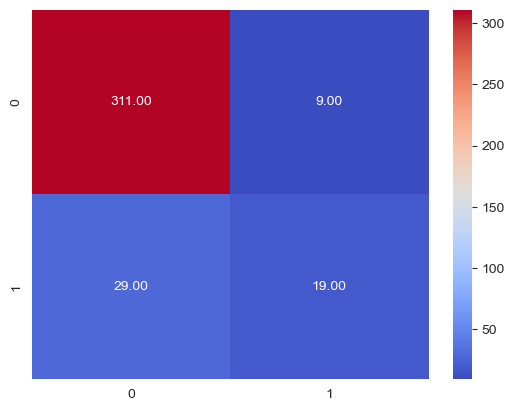

In [52]:
con_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(con_mat, annot=True, fmt=".2f", cmap="coolwarm")

In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       320
           1       0.68      0.40      0.50        48

    accuracy                           0.90       368
   macro avg       0.80      0.68      0.72       368
weighted avg       0.88      0.90      0.88       368



In [54]:
datos_hr["Attrition"].value_counts()

Attrition
0    1233
1     237
Name: count, dtype: int64

#### Conclusiones del Modelo de Regresión Logística

Hemos construido y entrenado un modelo de Regresión Logística para predecir el abandono de empleados. La evaluación inicial utilizando la matriz de confusión y el reporte de clasificación muestra que, si bien el modelo alcanza una precisión general (accuracy) del 90%, su capacidad para identificar a los empleados que realmente abandonarán la empresa es limitada.

Este rendimiento desigual entre las clases (alta capacidad para predecir "No Abandona" vs. baja capacidad para predecir "Abandona") es un resultado directo del **marcado desbalance en nuestro conjunto de datos**, donde la cantidad de empleados que no abandonaron es significativamente mayor que la de aquellos que sí lo hicieron (aproximadamente 1233 vs 237 en el dataset completo, reflejado en el split de prueba con 320 vs 48). El modelo tiende a predecir la clase mayoritaria con más frecuencia. El bajo valor de `recall` (0.40) para la clase "Abandona" es una métrica clave que subraya esta limitación, indicando que se están pasando por alto una gran parte de los casos positivos reales (empleados que sí abandonan).